In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Csv file_path to read
!pwd
file_path = '../../data/euromillions_202002.csv' 

# Read the data into a DataFrame
encoding = 'latin-1' 
df = pd.read_csv(file_path, delimiter=';',encoding=encoding)

df.head()
df.info()
df.memory_usage(deep=True)


/home/sterstc/code/STERSTC/139838160_project/src/app


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 76 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   annee_numero_de_tirage                               415 non-null    int64  
 1   jour_de_tirage                                       415 non-null    object 
 2   date_de_tirage                                       415 non-null    object 
 3   numéro_de_tirage_dans_le_cycle                       415 non-null    object 
 4   date_de_forclusion                                   415 non-null    object 
 5   boule_1                                              415 non-null    int64  
 6   boule_2                                              415 non-null    int64  
 7   boule_3                                              415 non-null    int64  
 8   boule_4                                              415 non-null    i

Index                                        128
annee_numero_de_tirage                      3320
jour_de_tirage                             26975
date_de_tirage                             27805
numéro_de_tirage_dans_le_cycle             24642
                                           ...  
nombre_de_gagnant_au_rang10_Etoile+         3320
rapport_du_rang10_Etoile+                  24892
numero_My_Million                          28220
numero_Tirage_Exceptionnel_Euro_Million    15730
Unnamed: 75                                 3320
Length: 77, dtype: int64

In [9]:
# Filter columns starting with "boule_" and "etoile_"
selected_columns = [col for col in df.columns if col.startswith(('boule_', 'etoile_'))]
filtered_df = df[selected_columns]

# Display the cleaned and filtered DataFrame
print(filtered_df)

     boule_1  boule_2  boule_3  boule_4  boule_5  etoile_1  etoile_2
0         48       23       14       50       39        12         3
1         50       27       28       48       44         7        12
2         18       21       33       45       10        12         8
3         18       16       17       49       45         9        12
4         12        9        2       39       40         3         1
..       ...      ...      ...      ...      ...       ...       ...
410       34       32       11       38       47        10         2
411        5       35       20       41       49        10         6
412       43       26       24       32       46         6        10
413       17       15        9       25       40         9         3
414       35       21       33       23       47         6         7

[415 rows x 7 columns]


Some data visualization

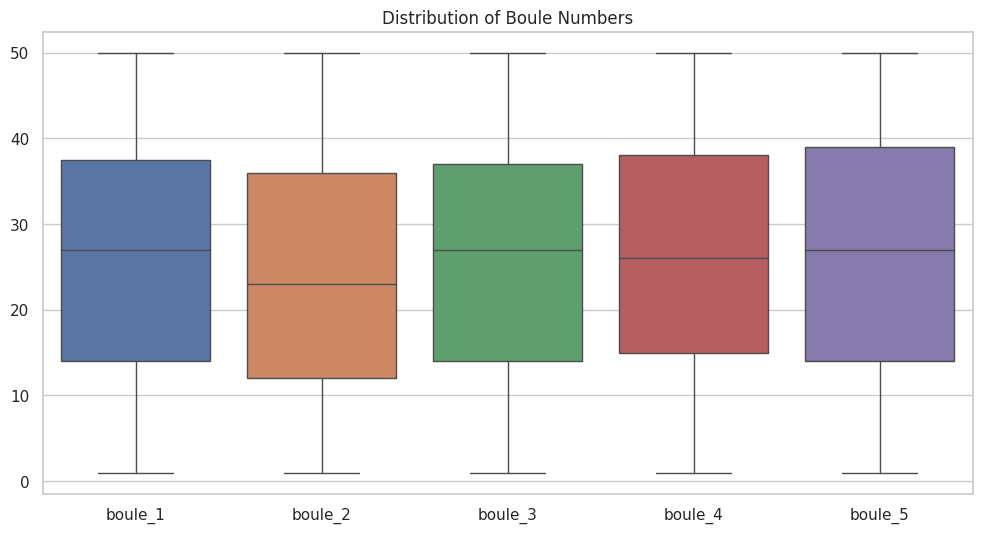

In [10]:

# Visualize the distribution of "boule_" columns
boule_columns = [col for col in filtered_df.columns if col.startswith('boule_')]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df[boule_columns])
plt.title('Distribution of Boule Numbers')
plt.show()

ValueError: Names should be list-like for a MultiIndex

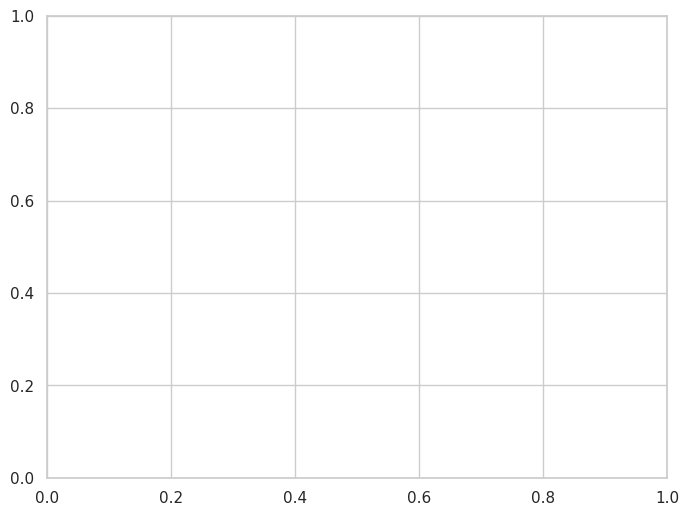

In [11]:
# Visualize the distribution of "etoile_" columns
etoile_columns = [col for col in filtered_df.columns if col.startswith('etoile_')]
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df[etoile_columns].stack(), palette="viridis")
plt.title('Count of Etoile Numbers')
plt.show()

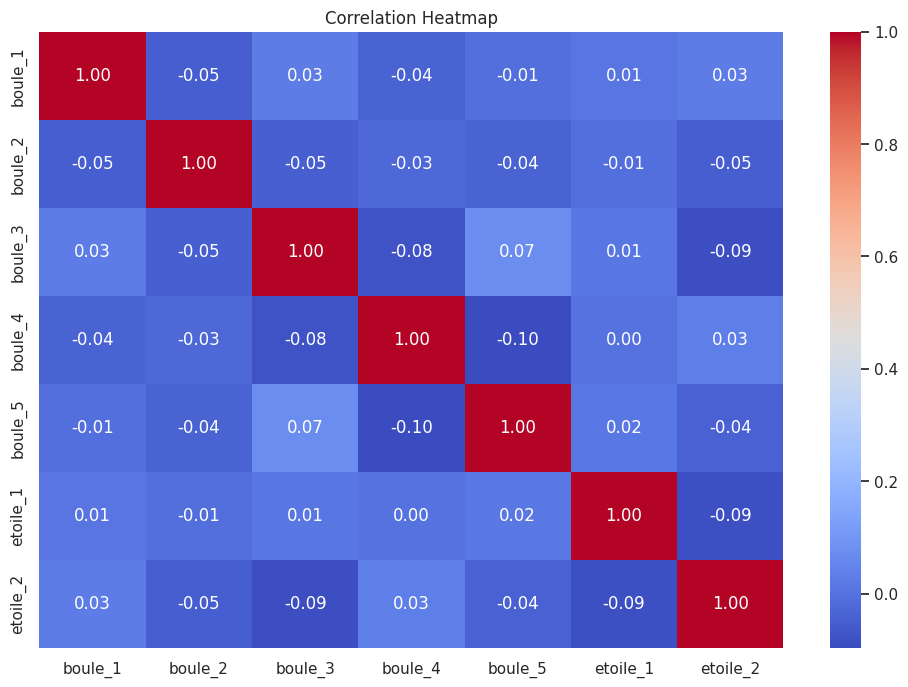

In [12]:
# Display correlation heatmap
correlation_matrix = filtered_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

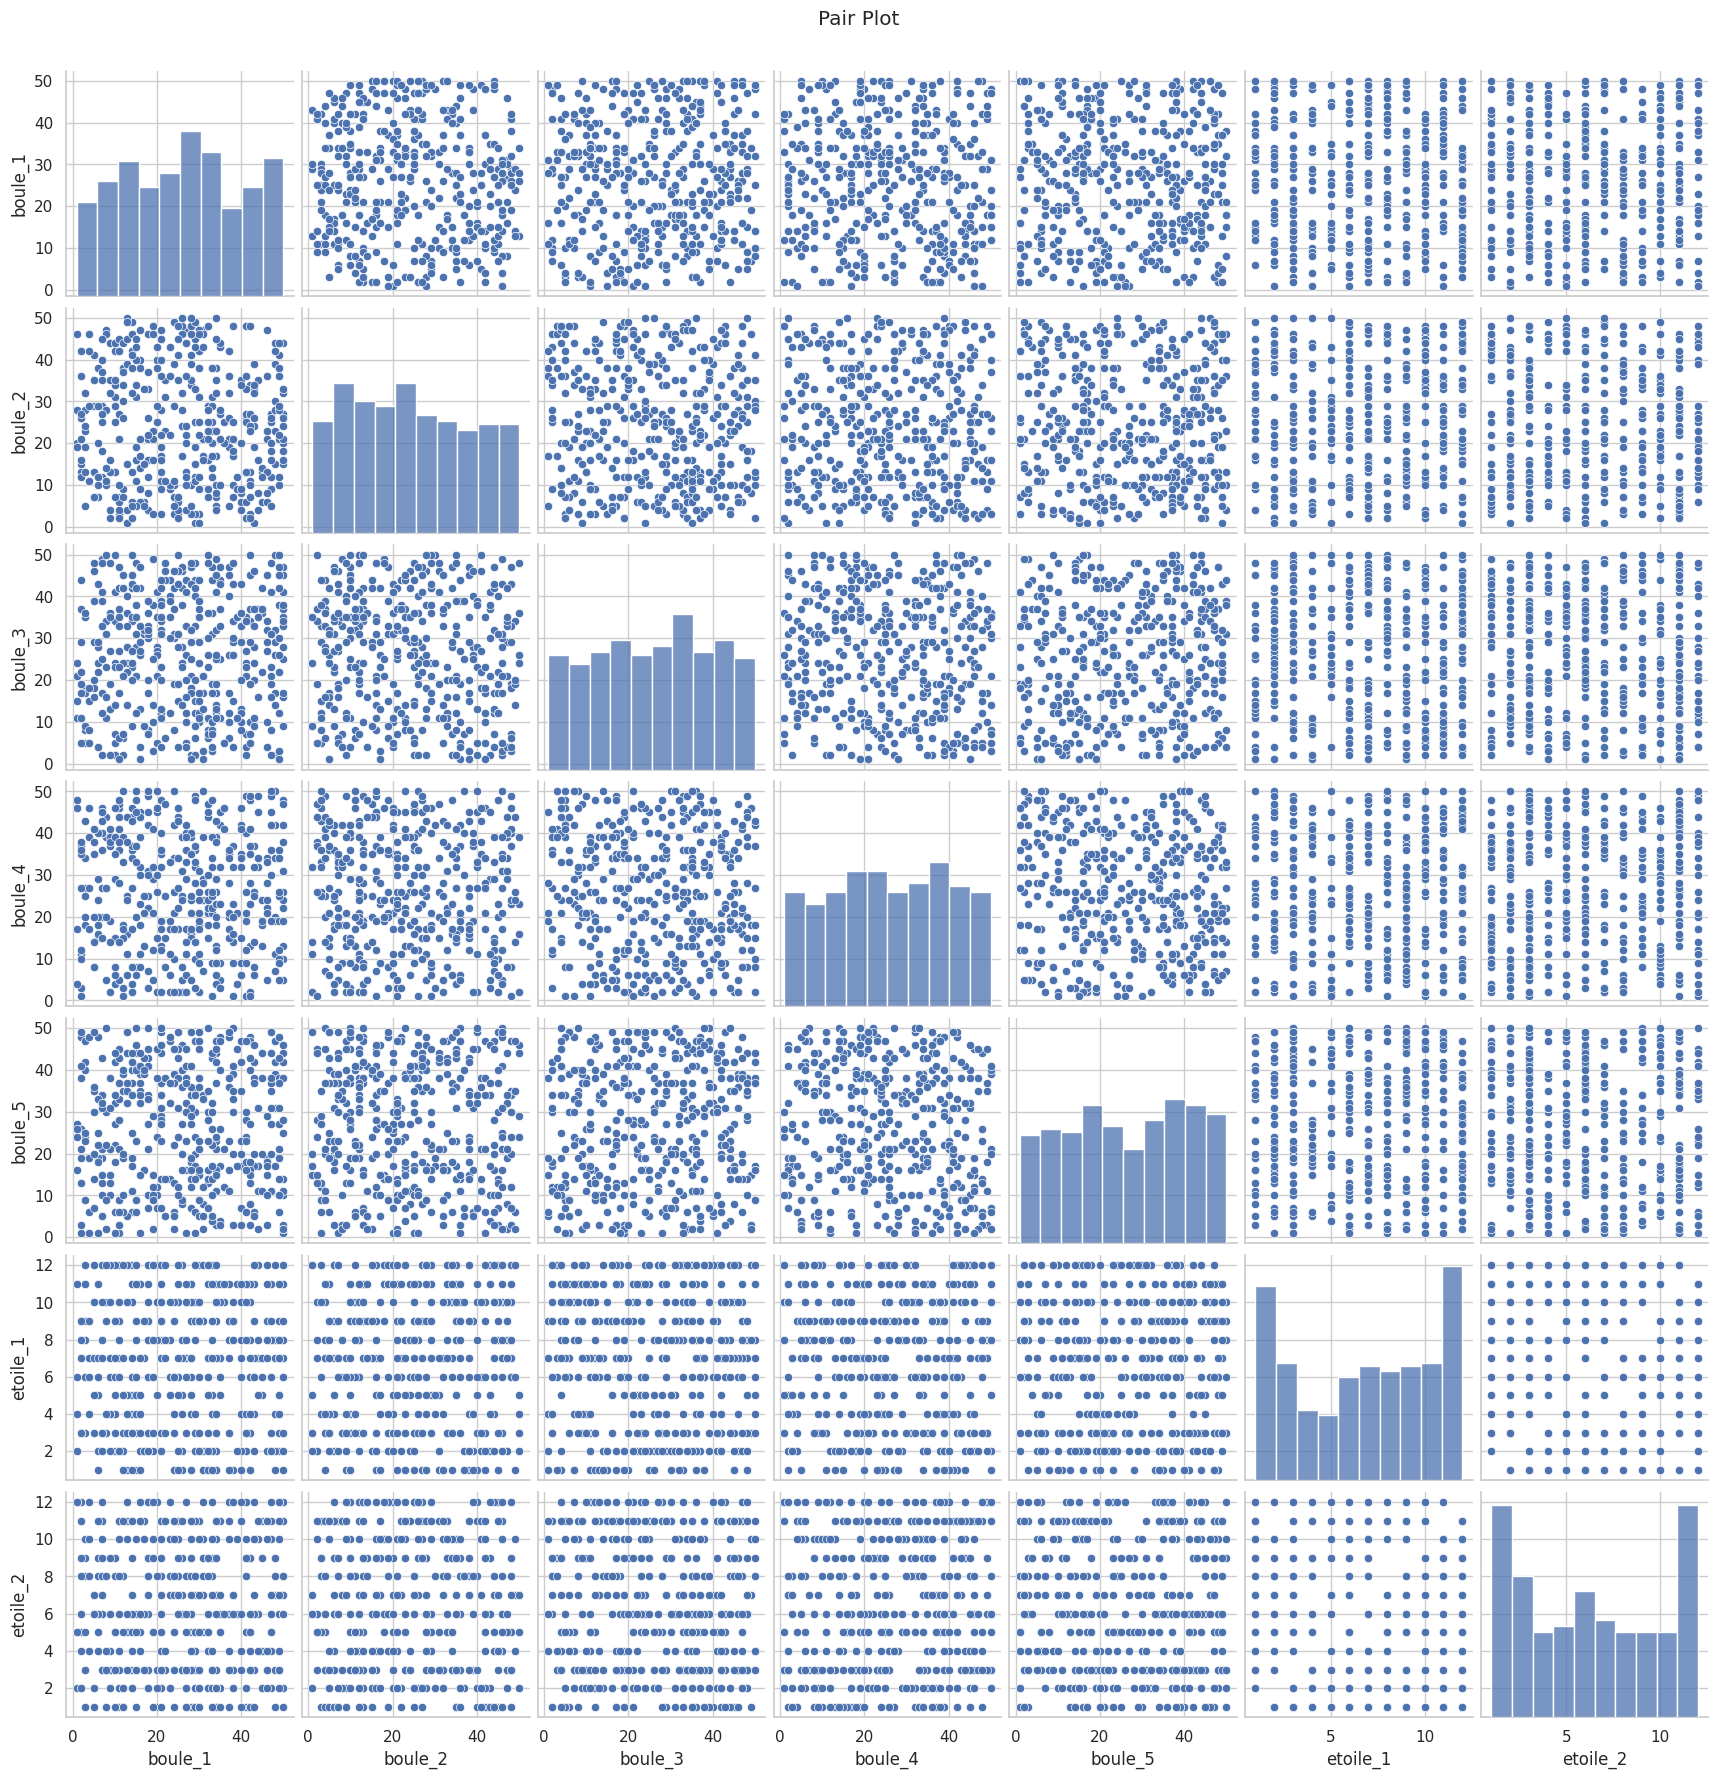

In [13]:
# Display pair plot
sns.pairplot(filtered_df)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

/tmp/ipykernel_6734/2759395976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


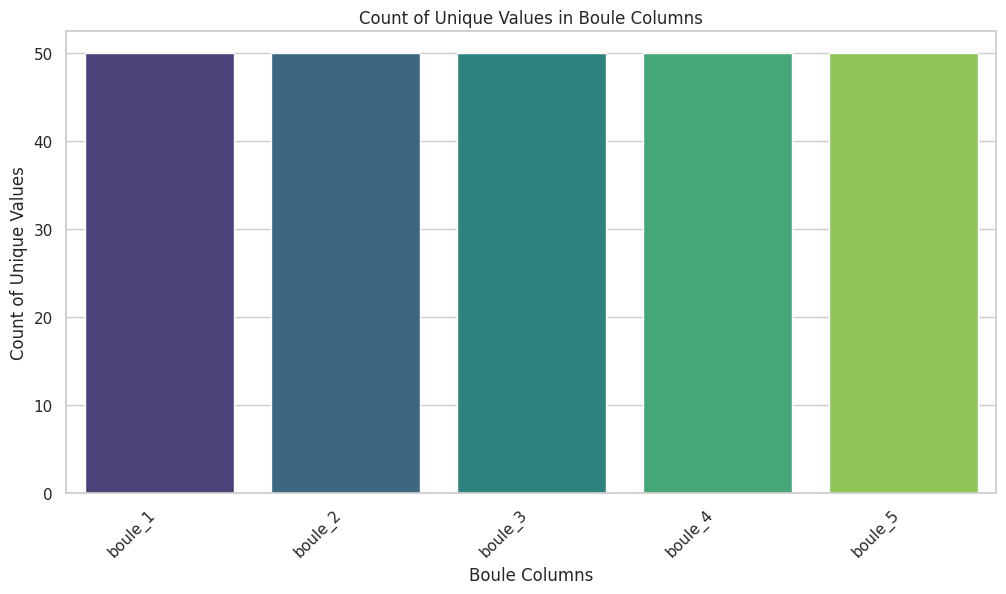

In [14]:
# Bar chart for the count of unique values in each "boule_" column
plt.figure(figsize=(12, 6))
unique_counts = filtered_df[boule_columns].nunique().sort_values(ascending=False)
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")
plt.title('Count of Unique Values in Boule Columns')
plt.xlabel('Boule Columns')
plt.ylabel('Count of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.show()